## EDA 


In [1]:
# Importando las librerias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import warnings 
warnings.filterwarnings('ignore')
# Correccion
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from typing import List, Dict

# Transforms

from tranformers.ColumnSelectorTransformer import ColumnSelectorTransformer
from tranformers.BinningTransformer import BinningTransformer
from tranformers.WOETransformer import WOETransformer

1.- Importamos los datos.

In [2]:
DataCredit = pd.read_csv("credit_risk_data_v2.csv",low_memory=False)

In [3]:
DataCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10665 non-null  int64  
 1   member_id                    10665 non-null  int64  
 2   loan_amnt                    10665 non-null  int64  
 3   funded_amnt                  10665 non-null  int64  
 4   funded_amnt_inv              10665 non-null  float64
 5   term                         10665 non-null  object 
 6   int_rate                     10665 non-null  float64
 7   installment                  10665 non-null  float64
 8   grade                        10665 non-null  object 
 9   sub_grade                    10665 non-null  object 
 10  emp_title                    9970 non-null   object 
 11  emp_length                   10290 non-null  object 
 12  home_ownership               10665 non-null  object 
 13  annual_inc      

In [4]:
# Obtener una lista de las columnas que contienen solo valores en blanco
empty_columns = [col for col in DataCredit.columns if DataCredit[col].isnull().all()]
# Eliminar las columnas que contienen solo valores en blanco
DataCredit.drop(empty_columns, axis=1, inplace=True)
# Se borrran las columnas que son identificadores ya que no nos sirven para nuestros modelos 
DataCredit.drop(['id','member_id'],axis=1, inplace=True)
# btener una Serie con la cantidad de valores nulos en cada columna
null_counts = DataCredit.isnull().sum()
# Filtrar las columnas con valores nulos y ordenarlas de manera ascendente
null_cols = null_counts[null_counts > 0].sort_values()
# Imprimir las columnas con valores nulos
print(null_cols)

total_rec_int                     1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
last_credit_pull_d                1
last_pymnt_amnt                   1
collection_recovery_fee           1
recoveries                        1
total_rec_late_fee                1
acc_now_delinq                    1
total_rec_prncp                   1
status                            1
total_pymnt                       1
out_prncp_inv                     1
out_prncp                         1
initial_list_status               1
total_pymnt_inv                   1
revol_util                        3
last_pymnt_d                     17
emp_length                      375
emp_title                       695
desc                           4402
mths_since_last_delinq         7241
next_pymnt_d                   9612
mths_since_last_record        10173
dtype: int64


In [5]:
DataCredit.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,status
loan_amnt,1.000000,0.990083,0.986555,0.330167,0.940908,0.370353,0.030736,-0.040062,0.021722,0.020064,0.006396,0.165436,-0.056142,0.333745,0.028500,0.264018,0.312110,0.311999,0.890764,0.887652,0.834993,0.731992,0.069724,0.156089,0.117688,0.451703,NaN,NaN,NaN,0.052035
funded_amnt,0.990083,1.000000,0.996685,0.326339,0.956507,0.369438,0.029705,-0.039399,0.025319,0.020773,0.004153,0.165618,-0.058565,0.332147,0.029833,0.260583,0.308511,0.308505,0.900369,0.897508,0.845875,0.735433,0.069008,0.157442,0.118318,0.452994,NaN,NaN,NaN,0.050572
funded_amnt_inv,0.986555,0.996685,1.000000,0.325574,0.954960,0.367803,0.029705,-0.040570,0.028095,0.022684,0.003394,0.165508,-0.059594,0.330930,0.031650,0.259535,0.308749,0.308857,0.898790,0.900566,0.843879,0.735247,0.069765,0.157697,0.118020,0.448758,NaN,NaN,NaN,0.050264
int_rate,0.330167,0.326339,0.325574,1.000000,0.288915,0.094083,0.089772,0.158994,0.192468,-0.099947,-0.048836,0.051467,0.093790,0.114388,0.472262,-0.005843,0.227421,0.227830,0.306804,0.305917,0.153192,0.552420,0.103837,0.149686,0.116536,0.168570,NaN,NaN,NaN,0.217732
installment,0.940908,0.956507,0.954960,0.288915,1.000000,0.381574,0.018940,-0.028420,0.026929,0.008241,-0.011812,0.164560,-0.053081,0.328614,0.066217,0.243661,0.205438,0.205586,0.865510,0.864593,0.840711,0.645129,0.074674,0.132259,0.098251,0.408395,NaN,NaN,NaN,0.027436
annual_inc,0.370353,0.369438,0.367803,0.094083,0.381574,1.000000,-0.169199,0.035412,0.039156,-0.031136,-0.019280,0.201192,-0.030773,0.368117,0.005985,0.312234,0.092463,0.092318,0.363829,0.362330,0.362370,0.256445,0.036958,0.027904,0.028612,0.203925,NaN,NaN,NaN,-0.065856
dti,0.030736,0.029705,0.029705,0.089772,0.018940,-0.169199,1.000000,-0.039704,0.021253,0.063771,0.087935,0.287420,-0.009182,0.221752,0.244753,0.230704,0.047325,0.047201,0.026336,0.026143,-0.001386,0.078529,0.005362,0.028809,0.029834,-0.012894,NaN,NaN,NaN,0.047820
delinq_2yrs,-0.040062,-0.039399,-0.040570,0.158994,-0.028420,0.035412,-0.039704,1.000000,0.004733,-0.646246,-0.035380,0.007319,0.004947,-0.057497,-0.037501,0.073017,0.009628,0.009785,-0.025732,-0.027108,-0.047466,0.031290,0.036154,0.010861,0.015156,-0.012975,NaN,NaN,NaN,0.029249
inq_last_6mths,0.021722,0.025319,0.028095,0.192468,0.026929,0.039156,0.021253,0.004733,1.000000,0.010248,-0.052130,0.102667,0.033622,-0.030659,-0.054182,0.119625,-0.015496,-0.014877,0.007894,0.010490,-0.011107,0.044660,0.019279,0.027272,0.027722,0.046907,NaN,NaN,NaN,0.073356
mths_since_last_delinq,0.020064,0.020773,0.022684,-0.099947,0.008241,-0.031136,0.063771,-0.646246,0.010248,1.000000,-0.035870,0.017887,0.039524,0.018307,0.089346,-0.045511,-0.003206,-0.003346,0.002808,0.004703,0.017658,-0.029165,-0.037011,-0.003812,-0.009536,-0.002170,NaN,NaN,NaN,-0.003142


Despues de hacer el analisis de las variables o columnas que vamos a utilizar decidimos utilzar estas.

Variables bins
1. loan_amnt
2. int_rate
3. installment
4. emp_length
5. annual_incc
6.  dti
7. revol_bal
8. revol_util
9.  total_acc
10. total_pymnt
11. total_rec_prncp
12. total_rec_int
13. recoveris
14. last_pymnt_amnt

no bins
1. grade 
2. term 
3. home_ownership 
4. purpose
5. pymnt_plan
6. addr_state
7. initial_list_status
8. status

In [6]:
ListColumns = ['loan_amnt','int_rate','installment','emp_length',
               'annual_inc','dti','revol_bal','revol_util','total_acc',
               'total_pymnt','total_rec_prncp','total_rec_int','recoveries',
               'last_pymnt_amnt','grade','term','home_ownership','purpose',
               'pymnt_plan','addr_state','initial_list_status','status']
DataCredit_clean = DataCredit[ListColumns]

In [7]:
DataCredit_clean.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt,status
count,10665.000000,10665.000000,10665.000000,1.066500e+04,10665.000000,10665.000000,10662.000000,10665.000000,10664.000000,10664.000000,10664.00000,10664.000000,10664.000000,10664.000000
mean,12825.002344,12.421012,363.011752,7.040254e+04,13.987993,13970.220159,52.352095,22.563526,13823.819908,10862.308177,2833.46169,127.021487,3317.972242,0.153695
std,8493.876716,4.246374,226.860644,4.913522e+04,6.640382,15227.767342,27.613719,11.136241,10212.941341,7880.070188,3265.11430,814.012722,5330.384198,0.360673
min,1000.000000,5.420000,21.740000,6.000000e+03,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6000.000000,8.900000,191.280000,4.210000e+04,8.930000,4689.000000,30.600000,14.000000,6059.948582,5000.000000,734.49500,0.000000,275.912500,0.000000
50%,11100.000000,12.420000,322.070000,6.000000e+04,14.020000,10091.000000,54.600000,21.000000,11310.177450,9475.000000,1581.97500,0.000000,639.975000,0.000000
75%,17475.000000,15.620000,480.040000,8.500000e+04,19.170000,17809.000000,75.000000,29.000000,18650.890600,15000.000000,3649.68000,0.000000,4245.330000,0.000000
max,35000.000000,24.110000,1288.100000,1.782000e+06,29.930000,148804.000000,99.900000,79.000000,56809.051630,35000.020000,23062.45000,29623.350000,36115.200000,1.000000


# Visualizaciones

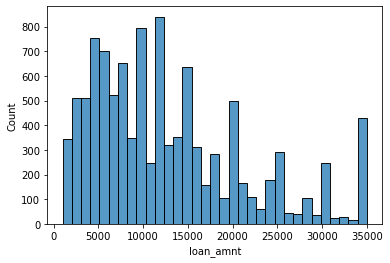

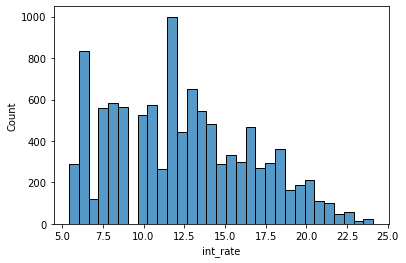

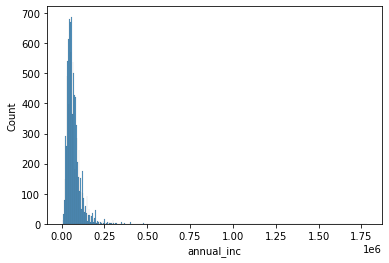

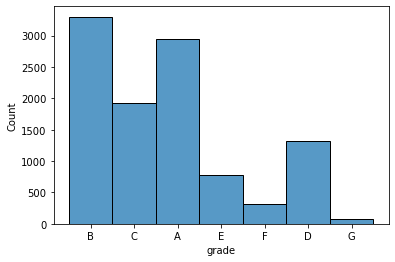

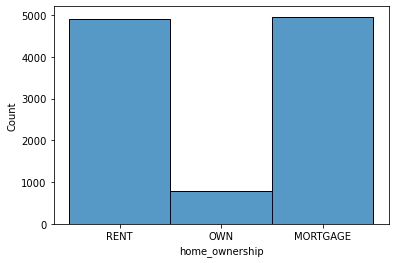

In [8]:
columnas = ['loan_amnt','int_rate','annual_inc','grade','home_ownership']
for col in columnas:
    sns.histplot(DataCredit_clean[col],kde=False,bins="auto")
    plt.show()

# Preprocessing

In [9]:
from bins import bins

In [10]:
X_train = DataCredit.drop('status', axis=1)
Y_train = DataCredit['status']
x_train ,x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=.30, random_state=42)
#x_train = x_train.dropna(axis=1)
#y_train = y_train.dropna(axis=1)
#x_train = x_train.drop(['emp_length', 'revol_util', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'initial_list_status'],axis=1)

cols_to_keep = ['loan_amnt','int_rate','installment',
               'annual_inc','dti','revol_bal','total_acc',
               'grade','term','home_ownership','purpose',
               'pymnt_plan']

# Transformations

In [11]:
column_t = ColumnSelectorTransformer(columns=cols_to_keep)
binning_t = BinningTransformer(bins=bins)
woe_t = WOETransformer(columns=cols_to_keep)

In [12]:
x_train_c = column_t.transform(x_train)
x_train_c.head()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,total_acc,grade,term,home_ownership,purpose,pymnt_plan
10629,13250,13.49,304.82,45000.0,28.37,10661,17.0,C,60 months,RENT,debt_consolidation,n
5935,12000,11.71,396.92,42600.0,4.96,6426,11.0,B,36 months,RENT,debt_consolidation,n
9068,35000,13.49,805.17,187000.0,10.63,9,31.0,C,60 months,MORTGAGE,small_business,n
4704,16000,19.91,423.11,78000.0,18.38,8679,16.0,E,60 months,MORTGAGE,debt_consolidation,n
4758,12000,18.25,306.36,35000.0,12.14,2397,9.0,D,60 months,MORTGAGE,small_business,n


In [13]:
x_train_b = binning_t.transform(x_train_c)
x_train_b.head()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,total_acc,grade,term,home_ownership,purpose,pymnt_plan
10629,"(12000, 14400)","(13, 15)","(250, 380)","(3.896000e+03, 4.500000e+04)","(23, 30)","(10.413000e+03, 1.176400e+04)","(7, 17)",C,60 months,RENT,debt_consolidation,n
5935,"(8000, 12000)","(11, 13)","(380, 430)","(3.896000e+03, 4.500000e+04)","(-inf, 14)","(-inf, 10.413000e+03)","(7, 17)",B,36 months,RENT,debt_consolidation,n
9068,"(30000, inf)","(13, 15)","(570, 1000)","(8.896000e+04, 2.500000e+06)","(-inf, 14)","(-inf, 10.413000e+03)","(25, 35)",C,60 months,MORTGAGE,small_business,n
4704,"(14400, 20000)","(17, 23)","(380, 430)","(7.327738e+04, 8.896000e+04)","(18, 23)","(-inf, 10.413000e+03)","(7, 17)",E,60 months,MORTGAGE,debt_consolidation,n
4758,"(8000, 12000)","(17, 23)","(250, 380)","(3.896000e+03, 4.500000e+04)","(-inf, 14)","(-inf, 10.413000e+03)","(7, 17)",D,60 months,MORTGAGE,small_business,n


In [14]:
woe_t.fit(x_train_b, y_train)

WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'], target_mappings={0: 'good', 1: 'bad'})

In [15]:
woe_t.transform(x_train_b).head()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,total_acc,grade,term,home_ownership,purpose,pymnt_plan
10629,0.051671,-0.165970,0.042946,-0.272987,-0.115445,-0.037720,-0.08668,-0.182630,-0.511157,-0.146178,-0.066565,0.0
5935,0.158806,0.102769,-0.060750,-0.272987,0.112571,-0.005049,-0.08668,0.209981,0.348041,-0.146178,-0.066565,0.0
9068,-0.544951,-0.165970,-0.099074,0.463305,0.112571,-0.005049,0.06214,-0.182630,-0.511157,0.147368,-0.587183,0.0
4704,-0.113652,-0.831439,-0.060750,0.055923,-0.173325,-0.005049,-0.08668,-0.779555,-0.511157,0.147368,-0.066565,0.0
4758,0.158806,-0.831439,0.042946,-0.272987,0.112571,-0.005049,-0.08668,-0.500549,-0.511157,0.147368,-0.587183,0.0


# WOE

In [16]:
woe_t.woe_mappings['loan_amnt']

,loan_amnt,good,bad,woe,info_val
5,"(30000, inf)",0.042236,0.072836,-0.544951,0.016676
2,"(14400, 20000)",0.171324,0.191945,-0.113652,0.002344
4,"(20000, 30000)",0.121150,0.132819,-0.091963,0.001073
0,"(-inf, 2000)",0.033503,0.032562,0.028476,0.000027
1,"(12000, 14400)",0.073992,0.070266,0.051671,0.000193
3,"(2000, 8000)",0.341855,0.315338,0.080739,0.002141
6,"(8000, 12000)",0.215942,0.184233,0.158806,0.005036


In [17]:
woe_t.woe_mappings['int_rate']

,int_rate,good,bad,woe,info_val
5,"(23, inf)",0.002382,0.005998,-0.923656,0.003340
4,"(17, 23)",0.135440,0.311054,-0.831439,0.146012
3,"(15, 17)",0.106065,0.149100,-0.340563,0.014656
2,"(13, 15)",0.116862,0.137961,-0.165970,0.003502
1,"(11, 13)",0.198476,0.179092,0.102769,0.001992
6,"(9, 11)",0.133376,0.089117,0.403215,0.017846
0,"(-inf, 9)",0.307399,0.127678,0.878637,0.157910


In [18]:
woe_t.woe_mappings['installment']

,installment,good,bad,woe,info_val
5,"(430, 570)",0.145919,0.162811,-0.109534,0.001850
6,"(570, 1000)",0.145125,0.160240,-0.099074,0.001497
4,"(380, 430)",0.071769,0.076264,-0.060750,0.000273
0,"(-inf, 100)",0.080025,0.081405,-0.017096,0.000024
3,"(250, 380)",0.261194,0.250214,0.042946,0.000472
1,"(100, 250)",0.283106,0.259640,0.086524,0.002030
2,"(1000, inf)",0.012861,0.009426,0.310758,0.001068


In [19]:
woe_t.woe_mappings['annual_inc']

,annual_inc,good,bad,woe,info_val
0,"(3.896000e+03, 4.500000e+04)",0.279136,0.366752,-0.272987,0.023918
1,"(4.500000e+04, 6.300000e+04)",0.242458,0.262211,-0.078321,0.001547
3,"(7.327738e+04, 8.896000e+04)",0.126866,0.119966,0.055923,0.000386
2,"(6.300000e+04, 7.327738e+04)",0.113211,0.101114,0.113001,0.001367
4,"(8.896000e+04, 2.500000e+06)",0.238330,0.149957,0.463305,0.040943


In [20]:
woe_t.woe_mappings['dti']

,dti,good,bad,woe,info_val
3,"(18, 23)",0.208955,0.248500,-0.173325,0.006854
4,"(23, 30)",0.091616,0.102828,-0.115445,0.001294
1,"(14, 16)",0.100191,0.104542,-0.042511,0.000185
2,"(16, 18)",0.092887,0.091688,0.012987,0.000016
0,"(-inf, 14)",0.506351,0.452442,0.112571,0.006069


In [21]:
woe_t.woe_mappings['revol_bal']

,revol_bal,good,bad,woe,info_val
3,"(10.413000e+03, 1.176400e+04)",0.054462,0.056555,-0.037720,0.000079
4,"(2.033300e+04\t, 1.568995e+06)",0.203715,0.206512,-0.013636,0.000038
0,"(-inf, 10.413000e+03)",0.509844,0.512425,-0.005049,0.000013
1,"(1.176400e+04, 1.623020e+04)",0.143379,0.141388,0.013981,0.000028
2,"(1.623020e+04, 2.033300e+04\t)",0.088600,0.083119,0.063852,0.000350


In [22]:
woe_t.woe_mappings['total_acc']

,total_acc,good,bad,woe,info_val
0,"(-inf, 7)",0.044776,0.073693,-0.498236,0.014408
5,"(7, 17)",0.321372,0.350471,-0.086680,0.002522
2,"(22, 25)",0.099238,0.096829,0.024568,0.000059
4,"(35, 100)",0.127977,0.123393,0.036475,0.000167
3,"(25, 35)",0.219752,0.206512,0.062140,0.000823
1,"(17, 22)",0.186885,0.149100,0.225873,0.008534


In [23]:
woe_t.woe_mappings['grade']

,grade,good,bad,woe,info_val
5,F,0.020641,0.065981,-1.162067,0.052688
6,G,0.005240,0.015424,-1.079660,0.010996
4,E,0.062877,0.137104,-0.779555,0.057864
3,D,0.114798,0.189374,-0.500549,0.037329
2,C,0.174182,0.209083,-0.182630,0.006374
1,B,0.315021,0.255356,0.209981,0.012529
0,A,0.307240,0.127678,0.878121,0.157678


In [24]:
woe_t.woe_mappings['term']

,term,good,bad,woe,info_val
1,60 months,0.305811,0.509854,-0.511157,0.104298
0,36 months,0.694189,0.490146,0.348041,0.071015


In [25]:
woe_t.woe_mappings['home_ownership']

,home_ownership,good,bad,woe,info_val
2,RENT,0.447920,0.518423,-0.146178,0.010306
1,OWN,0.074468,0.069409,0.070358,0.000356
0,MORTGAGE,0.477612,0.412168,0.147368,0.009644


In [26]:
woe_t.woe_mappings['purpose']

,purpose,good,bad,woe,info_val
10,small_business,0.039060,0.070266,-0.587183,0.018323
7,moving,0.012544,0.018852,-0.407390,0.002570
8,other,0.082566,0.114824,-0.329807,0.010639
6,medical,0.015402,0.017995,-0.155607,0.000404
2,debt_consolidation,0.505081,0.539846,-0.066565,0.002314
4,house,0.011432,0.010283,0.105964,0.000122
0,car,0.030803,0.025707,0.180865,0.000922
12,wedding,0.023658,0.017995,0.273628,0.001550
1,credit_card,0.153382,0.111397,0.319834,0.013428
3,home_improvement,0.070975,0.047129,0.409430,0.009763


In [27]:
woe_t.woe_mappings['pymnt_plan']

,pymnt_plan,good,bad,woe,info_val
0,n,1.0,1.0,0.0,0.0


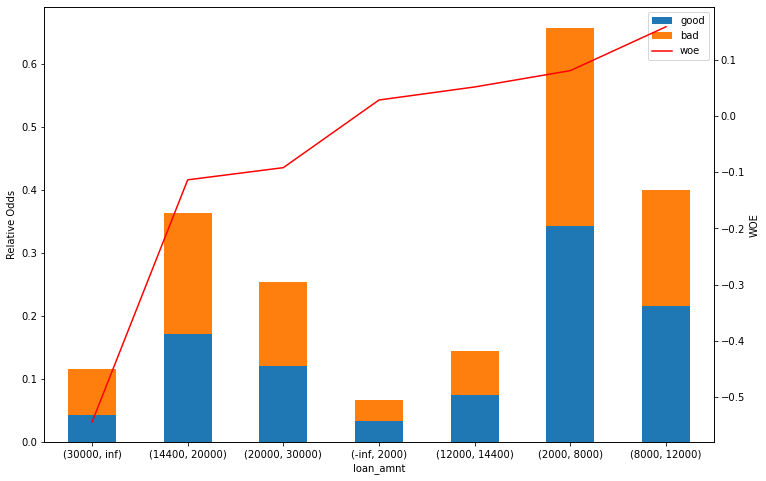

In [28]:
ax = woe_t.woe_mappings["loan_amnt"].plot.bar(
    x="loan_amnt", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["loan_amnt"].plot(
    x="loan_amnt", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

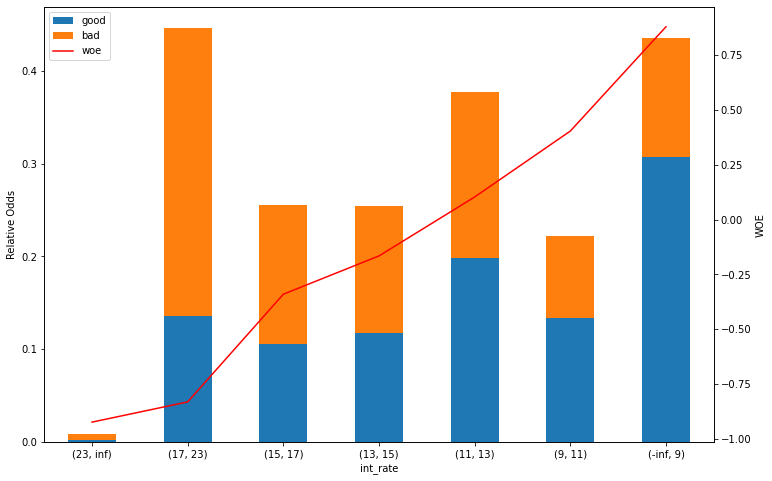

In [29]:
ax = woe_t.woe_mappings["int_rate"].plot.bar(
    x="int_rate", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["int_rate"].plot(
    x="int_rate", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

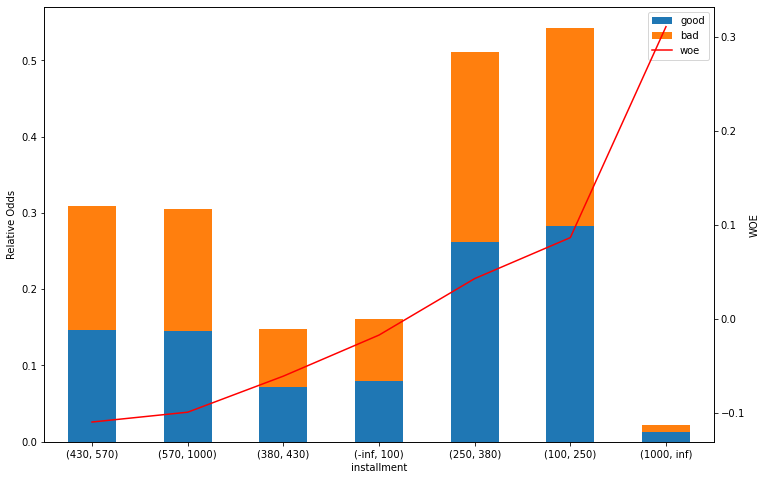

In [30]:
ax = woe_t.woe_mappings["installment"].plot.bar(
    x="installment", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["installment"].plot(
    x="installment", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

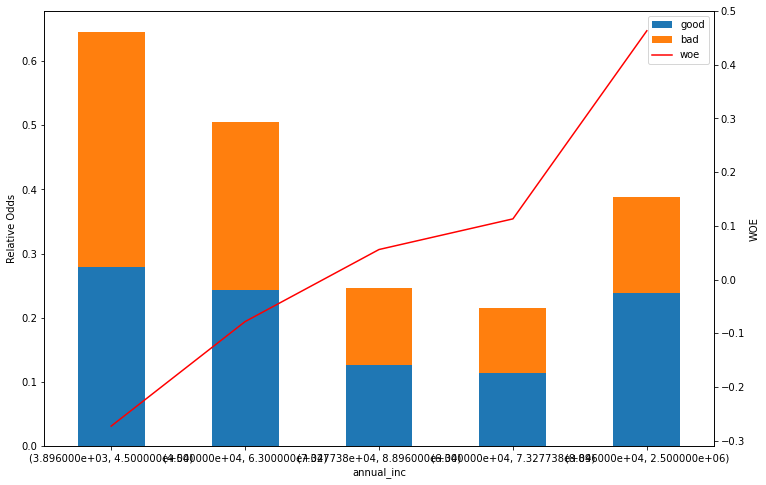

In [31]:
ax = woe_t.woe_mappings["annual_inc"].plot.bar(
    x="annual_inc", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["annual_inc"].plot(
    x="annual_inc", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

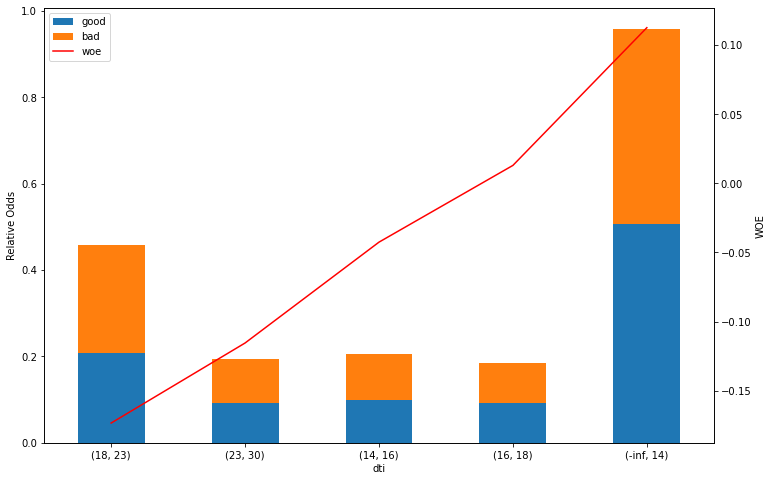

In [32]:
ax = woe_t.woe_mappings["dti"].plot.bar(
    x="dti", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["dti"].plot(
    x="dti", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

# Pipelines

In [33]:
seed = 0

In [34]:
# LOgistic
ml_pipe = Pipeline([
    ('col selector', ColumnSelectorTransformer(columns=cols_to_keep)),
    ('bins', BinningTransformer(bins=bins)),
    ('woe', WOETransformer(columns=cols_to_keep)),
    ('logistic regression', LogisticRegression(random_state=seed))
    #('gdbt', GradientBoostingClassifier(random_state=seed))
])

In [35]:
# ForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline([
    ('col selector', ColumnSelectorTransformer(columns=cols_to_keep)),
    ('bins', BinningTransformer(bins=bins)),
    ('woe', WOETransformer(columns=cols_to_keep)),
    #('logistic regression', LogisticRegression(random_state=seed))
    #('gdbt', GradientBoostingClassifier(random_state=seed))
    ('rforest_model', RandomForestClassifier(random_state=seed))
])

In [36]:
# Gradient
Gr_pipe = Pipeline([
    ('col selector', ColumnSelectorTransformer(columns=cols_to_keep)),
    ('bins', BinningTransformer(bins=bins)),
    ('woe', WOETransformer(columns=cols_to_keep)),
    #('logistic regression', LogisticRegression(random_state=seed))
    ('gdbt', GradientBoostingClassifier(random_state=seed))
])

In [37]:
y_train_nd = [1 if val==0 else 0 for val in y_train.values]
y_test_nd =  [1 if val==0 else 0 for val in y_test.values]

## Logistic

In [38]:
ml_pipe.fit(x_train, y_train_nd)

Pipeline(steps=[('col selector',
                 ColumnSelectorTransformer(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'])),
                ('bins', BinningTransformer()),
                ('woe',
                 WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'], target_mappings={0: 'good', 1: 'bad'})),
                ('logistic regression', LogisticRegression(random_state=0))])

In [39]:
ml_pipe.score(x_train, y_train_nd)

0.8431346282652378

In [40]:
ml_pipe.predict_proba(x_train)

array([[0.31144031, 0.68855969],
       [0.16318983, 0.83681017],
       [0.21659844, 0.78340156],
       ...,
       [0.06125861, 0.93874139],
       [0.27403679, 0.72596321],
       [0.10188198, 0.89811802]])

In [41]:
y_pred = ml_pipe.predict(x_test)

In [42]:
fpr, tpr, threshold = roc_curve(y_test_nd, ml_pipe.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test_nd, y_pred)
print(f"ROC AUC: {roc_auc}")
print(f"F1: {f1}")

ROC AUC: 0.6963653729714057
F1: 0.9202433254477864


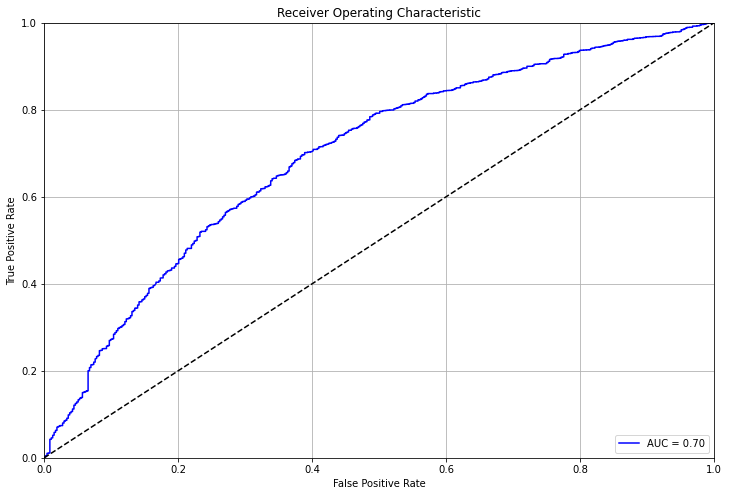

In [43]:
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ForestClassifier

In [44]:
rf_pipe.fit(x_train, y_train_nd)

Pipeline(steps=[('col selector',
                 ColumnSelectorTransformer(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'])),
                ('bins', BinningTransformer()),
                ('woe',
                 WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'], target_mappings={0: 'good', 1: 'bad'})),
                ('rforest_model', RandomForestClassifier(random_state=0))])

In [45]:
rf_pipe.score(x_train, y_train_nd)

0.9839249832551908

In [46]:
rf_pipe.predict_proba(x_train)

array([[0.04      , 0.96      ],
       [0.09933333, 0.90066667],
       [0.05      , 0.95      ],
       ...,
       [0.        , 1.        ],
       [0.1       , 0.9       ],
       [0.04      , 0.96      ]])

In [47]:
y_pred = rf_pipe.predict(x_test)

In [48]:
fpr, tpr, threshold = roc_curve(y_test_nd, rf_pipe.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test_nd, y_pred)
print(f"ROC AUC: {roc_auc}")
print(f"F1: {f1}")

ROC AUC: 0.6389968454209762
F1: 0.9058171745152355


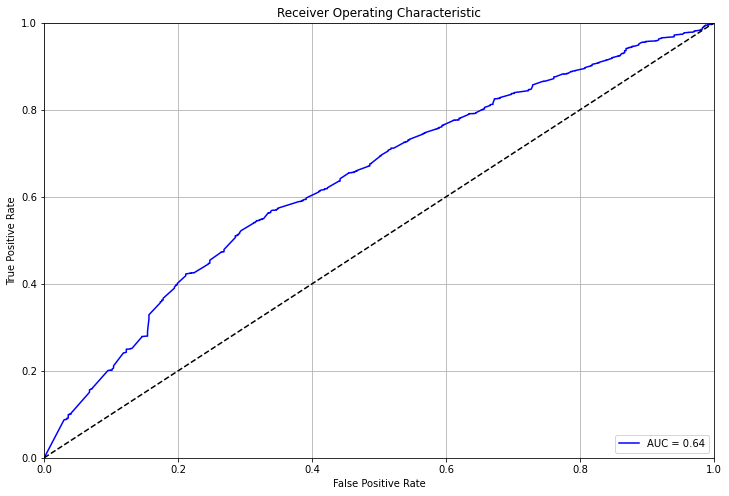

In [49]:
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient

In [50]:
Gr_pipe.fit(x_train, y_train_nd)

Pipeline(steps=[('col selector',
                 ColumnSelectorTransformer(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'])),
                ('bins', BinningTransformer()),
                ('woe',
                 WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'], target_mappings={0: 'good', 1: 'bad'})),
                ('gdbt', GradientBoostingClassifier(random_state=0))])

In [51]:
Gr_pipe.score(x_train, y_train_nd)

0.8467515070328199

In [52]:
Gr_pipe.predict_proba(x_train)

array([[0.2729186 , 0.7270814 ],
       [0.17497323, 0.82502677],
       [0.27769021, 0.72230979],
       ...,
       [0.0676859 , 0.9323141 ],
       [0.31108763, 0.68891237],
       [0.07924697, 0.92075303]])

In [53]:
y_pred = Gr_pipe.predict(x_test)

In [54]:
fpr, tpr, threshold = roc_curve(y_test_nd, Gr_pipe.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test_nd, y_pred)
print(f"ROC AUC: {roc_auc}")
print(f"F1: {f1}")

ROC AUC: 0.6880889639351532
F1: 0.9211772665764546


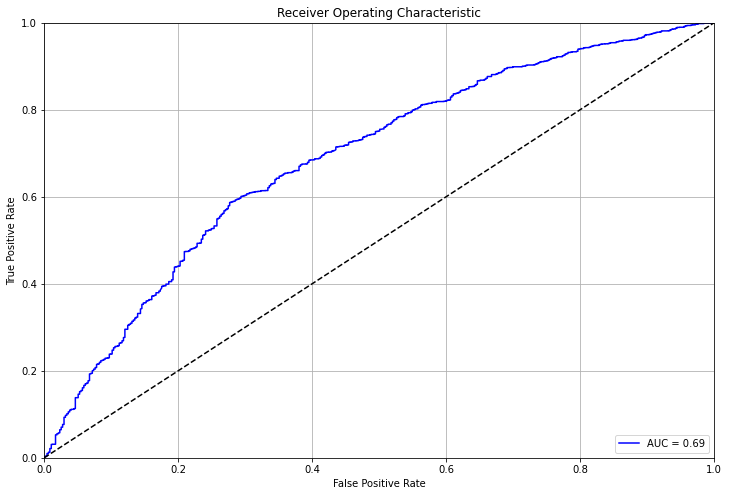

In [55]:
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Stacking Regressor

In [56]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ('logistic regression', ml_pipe),
    ('rforest_model', rf_pipe),
    ('gdbt', Gr_pipe),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [57]:
stacking_regressor

StackingRegressor(estimators=[('logistic regression',
                               Pipeline(steps=[('col selector',
                                                ColumnSelectorTransformer(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'])),
                                               ('bins', BinningTransformer()),
                                               ('woe',
                                                WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'ann...
                                                ColumnSelectorTransformer(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'])),
                                               ('bins', BinningTransformer()),
                                               ('woe',
                                                WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'], target_mappings={0: 'good', 1: 'bad'})),
                                               ('gdbt',
                                                GradientBoostingClassifier(random_state=0))]))],
                  final_estimator=RidgeCV())

In [58]:
meta_model = LogisticRegression()

In [59]:
from mlxtend.classifier import StackingClassifier

stack_model = StackingClassifier(
    classifiers=[ml_pipe, rf_pipe, Gr_pipe],
    meta_classifier=meta_model,
    use_probas=True,
    average_probas=False
)

In [60]:
stack_model.fit(x_train, y_train_nd)

StackingClassifier(classifiers=[Pipeline(steps=[('col selector',
                                                 ColumnSelectorTransformer(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'])),
                                                ('bins', BinningTransformer()),
                                                ('woe',
                                                 WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revo...
                                                 ColumnSelectorTransformer(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'])),
                                                ('bins', BinningTransformer()),
                                                ('woe',
                                                 WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan'], target_mappings={0: 'good', 1: 'bad'})),
                                                ('gdbt',
                                                 GradientBoostingClassifier(random_state=0))])],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [61]:
stack_model.score(x_train, y_train_nd)

0.9841929002009377

In [62]:
stack_model.predict_proba(x_train)

array([[0.0019142 , 0.9980858 ],
       [0.00605387, 0.99394613],
       [0.00245574, 0.99754426],
       ...,
       [0.00162217, 0.99837783],
       [0.00482166, 0.99517834],
       [0.00283881, 0.99716119]])

In [63]:
y_pred = stack_model.predict(x_test)

In [64]:
fpr, tpr, threshold = roc_curve(y_test_nd, stack_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test_nd, y_pred)
print(f"ROC AUC: {roc_auc}")
print(f"F1: {f1}")

ROC AUC: 0.6288849815214079
F1: 0.8979305506839705


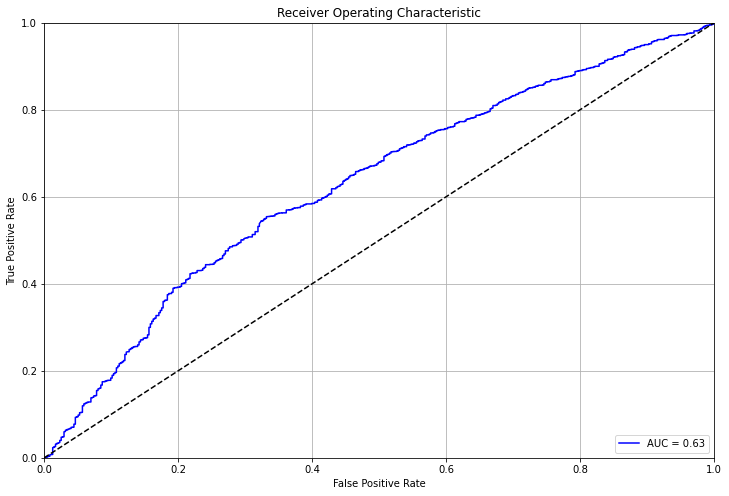

In [65]:
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()